# Trabalho de Inteligência Artificial - 2019/2

Gustavo Eugênio de Souza Moraes RA: 620238<br>
Gabriel Givigi Oliveira RA: 760924

### Bibliotecas utilizadas e variáveis globais

In [1]:
from pandas import DataFrame, read_csv # for reading tsv files and structuring
import math # for mathematical functions
import numpy as np # for vector stuff
import matplotlib.pyplot as plt # for plotting graphs
from scipy.spatial import distance, distance_matrix # for euclidian distance
from random import randint # for generating random colors
import time

dataset1 = read_csv("datasets/c2ds1-2sp.txt", sep="\t", index_col="sample_label") # Lê o arquivo de dados
dataset2 = read_csv("datasets/c2ds3-2g.txt", sep="\t", index_col="sample_label") # Lê o arquivo de dados
dataset3 = read_csv("datasets/monkey.txt", sep="\t", index_col="sample_label") # Lê o arquivo de dados

datatest = dataset1[:100]

In [2]:
def k_medias(k, dataframe, n_iterations):
    
    # initialize clusters and centroids with k-first rows
    for index in range(k): 
        dataframe.iat[index,2] = index
        
    centroid = dataframe.iloc[:k].set_index('cluster_id').copy()

    # run n_iteration times
    for j in range(n_iterations): 
        # (re)calc centroids
        for i in range(0, k):
            this = dataframe[dataframe.cluster_id == i] # capture all samples from centroid i
            centroid.loc[i] = {'d1':this.d1.mean(), 'd2':this.d2.mean(), 'cluster_id':i} # atualizing centroid i
        
        # for each sample, compare disctance with centroid
        for index_data, row_data in dataframe.iterrows(): 
            calculated_distance = []
            
            for index_centroid, row_centroid in centroid.iterrows(): # checks each sample and takes the distances
                calculated_distance.append(distance.euclidean([row_data['d1'], row_data['d2']], [row_centroid['d1'], row_centroid['d2']]))
                
            row_data.loc['cluster_id'] = calculated_distance.index(min(calculated_distance)) # saves the shortest distance
            dataframe.loc[index_data] = row_data # sends it back to the dataframe
            
    return dataframe

In [3]:
def single_link(dataframe, k_min, k_max):
        
    start = time.time()

        
    # creates a distance matrix in dataframe format
    dist_matrix = DataFrame(distance_matrix(dataframe.values, dataframe.values))

    clusters = []
    resultados = []
    
    count = 0;
    for sample in dataframe.iterrows():
        clusters.append([sample])
            
    for k in range(len(dataframe), k_min, -1):
        
        closest_idx = []
        closest_values = []

        # initializing position and possible closest
        pos = 0
        possible_closest = [0,1]
        
        # for each row
        while(pos < len(dist_matrix)-1):

            # find closest pair of this row
            possible_closest = [dist_matrix.index[pos], dist_matrix.iloc[pos, pos+1:].idxmin()]

            # add index and values to respectives possible's list
            closest_idx.append(possible_closest)
            closest_values.append(dist_matrix.at[possible_closest[0], possible_closest[1]])

            # iteration end
            pos+=1
            
        # find the closest pair of all clusters
        [p1, p2] = closest_idx[closest_values.index(min(closest_values))]

        # find minimum distances in p1 and p2, saves them in p1 
        for index in dist_matrix.columns:
            dist_matrix.at[p1, index] = dist_matrix.at[p1, index] = min(dist_matrix.at[p1, index], dist_matrix.at[p2, index])

        # get positional indexes for list structures
        ip1 = dist_matrix.index.get_loc(p1)
        ip2 = dist_matrix.index.get_loc(p2)
        
        # merge clusters (p1 and p2) 
        clusters[ip1] += clusters.pop(ip2)
                
         # drops p2 for it's irrelevance, p2 is inside p1 now
        dist_matrix = dist_matrix.drop(index=p2, columns=p2)

        if ( len(clusters) <= k_max):
            resultados.append(clusters.copy())
        
        # Optional completion feedback
#         print("Iteration complete, %d clusters remaining" % (k-1))
    end = time.time()
    print("Tempo de execução: %.2f segundos" % (end - start))
    return resultados

# Rodando os algoritmos

### Primeiramente, o K-Médias:

In [4]:
# escolha aqui o valor de k e o numero de iterações
k_list = [2,3,4,5];
n_iterations = 5;

# resultados = [];
# for k in k_list:
#     manipulated_df = dataset1.copy() # setting up manipulated dataset for use
#     manipulated_df['cluster_id'] = None # adding a column for cluster
#     resultados.append(k_medias(k, manipulated_df, n_iterations)) # salva o resultado

#     resultados[-1].plot.scatter('d1', 'd2', c='cluster_id', colormap='gist_rainbow')
#     plt.suptitle("K-Means for dataset 1 (c2ds1-2sp) with k = %d and %d iterations" % (k, n_iterations))
#     plt.show()
    
# resultados = [];
# for k in k_list:
#     manipulated_df = dataset2.copy() # setting up manipulated dataset for use
#     manipulated_df['cluster_id'] = None # adding a column for cluster
#     resultados.append(k_medias(k, manipulated_df, n_iterations)) # salva o resultado

#     resultados[-1].plot.scatter('d1', 'd2', c='cluster_id', colormap='gist_rainbow')
#     plt.suptitle("K-Means for dataset 2 (c2ds3-2g) with k = %d and %d iterations" % (k, n_iterations))
#     plt.show()

### Agora o Single-Link:

In [5]:
k_min = 2
k = k_max = 5

resultados = single_link(dataset1, k_min, k_max)

Tempo de execução: 200.67 segundos


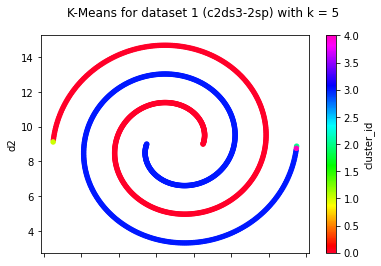

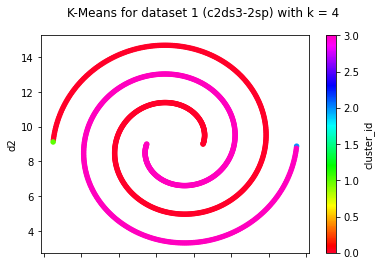

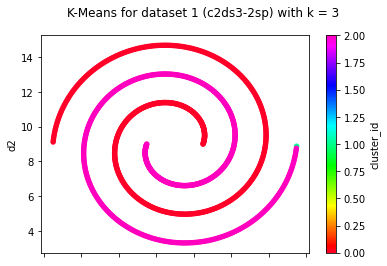

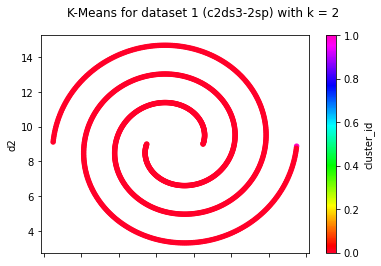

In [6]:
for resultado in resultados:
    manipulated_df = dataset1.copy() # setting up manipulated dataset for use
    manipulated_df['cluster_id'] = None # adding a column for cluster

    cluster_id = 0
    for cluster in resultado:
        for index, sample in cluster:
            manipulated_df.at[index, 'cluster_id'] = cluster_id
        cluster_id += 1

    manipulated_df.plot.scatter('d1', 'd2', c='cluster_id', colormap='gist_rainbow')
    plt.suptitle("Single-Link for dataset 1 (c2ds3-2sp) with k = %d" % k)
    plt.show()
    k -= 1